## Modelos 

In [2]:
# Librerias requeridas
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler # Para normalizar de datos

# Actualizar el archivo de funciones
import importlib 
import A_Funciones as funciones # Este archivo contiene las funciones a utilizar
importlib.reload(funciones) # Actualiza los cambios en el archivo de las funciones

# Algoritmos para los modelos 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

from sklearn.preprocessing import StandardScaler # Para normalizar de datos
from sklearn.model_selection import RandomizedSearchCV # Seleccionar mejor modelo
import joblib # Para guardar modelos 
import openpyxl # Para crear archivos .xlsx 

In [3]:
# Cargar los datos de reclamaciones 
df_reclamaciones = joblib.load('Data_final\\df_final_reclamaciones.pkl')

In [4]:
df_reclamaciones

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico
0,18686469,1.0,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1579219,40,61.0,Diagnostico Pendiente
1,18686469,1.0,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,442805,40,61.0,Diagnostico Pendiente
2,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,461626,40,729.0,Diagnostico Pendiente
3,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,593054,40,729.0,Diagnostico Pendiente
4,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,455257,40,729.0,Diagnostico Pendiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781400,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,579721,45,729.0,Pruebas complementarias
3781401,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,479786,45,729.0,Diagnostico Pendiente
3781402,34178573,1.0,Cali,0,0,0,0,0.0,LABORATORIO CLINICO,1,675070,45,729.0,Diagnostico Pendiente
3781403,34178573,1.0,Cali,0,0,0,0,0.0,CONSULTA EXTERNA,2,565193,45,729.0,Diagnostico Pendiente


### Modelo reclamaciones

Este modelo se realiza con el propósito de cumplir uno de los primeros objetivos del reto, que es lograr predecir los costos asociados que tendrán los usuarios respectos a sus seguros en salud a lo largo para así poder tarifar los seguros. 

In [5]:
# Generamos variables dummies
df_reclamaciones = pd.get_dummies(df_reclamaciones, dtype = int)


In [6]:
y = df_reclamaciones.Valor_Pagado
X0 = df_reclamaciones.loc[:,~ df_reclamaciones.columns.isin(['Valor_Pagado','Asegurado_Id'])]

In [7]:
scaler = StandardScaler()
scaler.fit(X0)

X1 = scaler.transform(X0)
X = pd.DataFrame(X1 , columns = X0.columns)
X

,Sexo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Eventos,Edad,Duracion_Poliza_Dias,Ciudad_Barranquilla,...,Clasificacion_Diagnostico_Enfermedades del sistema nervioso,Clasificacion_Diagnostico_Enfermedades digestivas,Clasificacion_Diagnostico_Enfermedades endocrinas,Clasificacion_Diagnostico_Enfermedades respiratorias,Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios),Clasificacion_Diagnostico_Lesiones traumaticas,Clasificacion_Diagnostico_Malformaciones congenitas,Clasificacion_Diagnostico_Neoplasias,Clasificacion_Diagnostico_Pruebas complementarias,Clasificacion_Diagnostico_Trastornos mentales
0,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,0.200468,0.253115,-2.265091,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,-2.265091,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
2,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
3,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
4,-1.521545,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.253115,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640817,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,10.088100,-0.01212
1640818,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1640819,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.362537,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212
1640820,0.657227,-0.046288,-0.144441,-0.220816,-0.084373,-0.03936,-0.081034,0.966383,0.683505,-0.16088,...,-0.044673,-0.084431,-0.011659,-0.039731,-0.255179,-0.084643,-0.008225,-0.052271,-0.099127,-0.01212


### Selección de variables y modelo 

In [8]:
# Modelos puesto a prueba
modelo_random_forest = RandomForestRegressor()
modelo_knn = KNeighborsRegressor()
modelo_xgboost = xgb.XGBRegressor()

modelos = list([modelo_random_forest, modelo_xgboost])

In [9]:
# RFE para la selección de variables para distintos modelos
def funcion_rfe(modelos, X, y, num_variables, paso):
  resultados = {}
  for modelo in modelos: 
    rfemodelo = RFE(modelo, n_features_to_select = num_variables, step = paso)
    fit = rfemodelo.fit(X,y)
    var_names = fit.get_feature_names_out()
    puntaje = fit.ranking_
    diccionario_importancia = {}
    nombre_modelo = modelo.__class__.__name__

    for i,j in zip(var_names,puntaje):
      diccionario_importancia[i] = j
      resultados[nombre_modelo] = diccionario_importancia
  
  return resultados

In [10]:
# Muestra aleatorio de los datos que garantize la reproducibilidad de los datos
X_sample = X.sample(frac = 0.05, random_state = 18)
y_sample = y.sample(frac = 0.05, random_state = 18)

In [11]:
X_sample.shape

(82041, 54)

In [12]:
# Selección de variables por el método de eliminación hacia atrás
df_resultados = pd.DataFrame(funcion_rfe(modelos, X_sample, y_sample, 38, 1))
df_resultados.fillna('No incluída',inplace = True)
df_resultados

C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_18220\4071276435.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No incluída' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_resultados.fillna('No incluída',inplace = True)


,RandomForestRegressor,XGBRegressor
Sexo,1.0,1.0
CANCER,1.0,1.0
EPOC,1.0,1.0
DIABETES,1.0,1.0
HIPERTENSION,1.0,1.0
ENF_CARDIOVASCULAR,1.0,1.0
Eventos,1.0,1.0
Edad,1.0,1.0
Duracion_Poliza_Dias,1.0,1.0
Ciudad_Barranquilla,1.0,1.0


In [13]:
# Variable selccionadas
var_names = ['Sexo', 'CANCER','EPOC','DIABETES','HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Eventos', 'Edad', 'Duracion_Poliza_Dias', 'Ciudad_Barranquilla',
             'Ciudad_Bogota','Ciudad_Cali','Ciudad_Cartagena','Ciudad_Medellin','Reclamacion_CONSULTA DE URGENCIAS', 'Reclamacion_CONSULTA EXTERNA',
             'Reclamacion_DIALISIS','Reclamacion_EXAMENES DE DIAGNOSTICO','Reclamacion_FISIOTERAPIA ILIMITADA', 'Reclamacion_LABORATORIO CLINICO',
             'Reclamacion_PAMD', 'Reclamacion_TRATAMIENTO AMBULATORIO POR CANCER', 'Reclamacion_TRATAMIENTOS AMBULATORIOS ESPECIALES',
             'Clasificacion_Diagnostico_Diagnostico Pendiente', 'Clasificacion_Diagnostico_Embarazo, parto y puerperio', 'Clasificacion_Diagnostico_Enfermedades de la piel',
             'Clasificacion_Diagnostico_Enfermedades del aparato circulatorio', 'Clasificacion_Diagnostico_Enfermedades del aparato genitourinario',
             'Clasificacion_Diagnostico_Enfermedades del aparato musculoesqueletico', 'Clasificacion_Diagnostico_Enfermedades del sistema nervioso',
             'Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios)', 'Clasificacion_Diagnostico_Lesiones traumaticas',
             'Clasificacion_Diagnostico_Neoplasias', 'Clasificacion_Diagnostico_Pruebas complementarias']
X_sel = X_sample[var_names]

In [14]:
# Validación del rendimiento de los modelos 
def medir_modelos(modelos, scoring, X, y, cv):

    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, scoring = scoring, cv = cv )
        pdscores = pd.DataFrame(scores)
        metric_modelos = pd.concat([metric_modelos,pdscores], axis = 1)
    
    metric_modelos.columns = ['RandomForestRegressor','XGBRegressor']
    return metric_modelos

In [15]:
# Medimos el desempeño de los modelos para todo el conjunto de datos y para las variables seleccionadas
r2_df = medir_modelos(modelos,'r2', X_sample, y_sample, 5)
display(r2_df)
r2_var_sel = medir_modelos(modelos, 'r2', X_sel, y_sample, 5)
display(r2_var_sel)

,RandomForestRegressor,XGBRegressor
0,0.397865,0.075319
1,0.380008,0.402681
2,-1.317878,-1.055380
3,0.368114,0.326114
4,0.192329,0.200077


,RandomForestRegressor,XGBRegressor
0,0.397909,0.053814
1,0.313703,0.422376
2,-1.068619,-0.897244
3,0.346322,0.306311
4,0.185692,0.215016


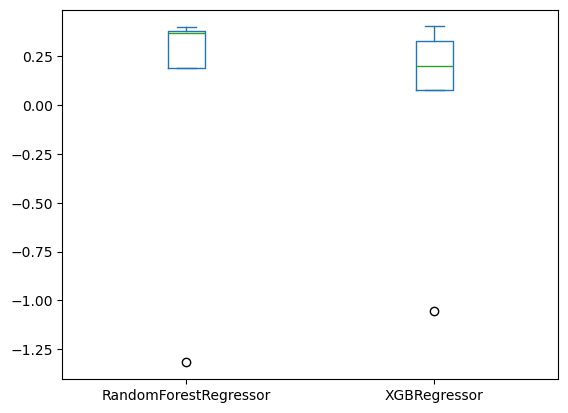

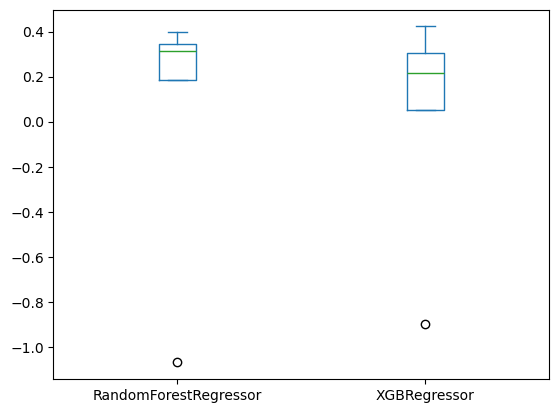

In [16]:
# Comparación entre el desempeño de los modelos con todas las variables y con las seleccionadas
r2_df.plot(kind = 'box');
r2_var_sel.plot(kind = 'box');

### Afinamiento de hiperparámetros

Al observar las gráficas comparativas, observamos que en promedio tiene un mejor desempeño el random forest con el conjunto de variables seleccionadas. Por tanto, se procede a realizar la optimización de hiperparámetros de dicho modelo. 

In [17]:
modelo_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
param_grid = [{'n_estimators': [1,2,5,20,50],
               'max_depth': [8,9,10,12,15,17,25], 
               'min_samples_split':[2, 10, 25, 50,100],
               'min_samples_leaf': [1,2,4,5,10,20,50],
               'max_features':[1,2,3,4,5,50]}]

- **n_estimators**: Es el número de árboles de decisión en el bosque. Un mayor número de árboles puede mejorar el rendimiento, pero también aumenta el tiempo de entrenamiento.
- **max_depth**: La profundidad máxima de los árboles de decisión. Los árboles más profundos pueden capturar patrones más complejos en los datos, pero también son más propensos a sobreajustarse.
- **min_samples_split**: El número mínimo de muestras necesarias para dividir un nodo. Un valor mayor puede evitar el sobreajuste, pero también puede hacer que el modelo sea menos flexible.
-  **min_samples_leaf**: Este hiperparámetro especifica el número mínimo de muestras que deben estar presentes en el nodo hoja después de dividir un nodo.
- **max_features**: El número de características a considerar cuando se busca la mejor división. Un mayor número de características puede conducir a un mejor rendimiento, pero también puede aumentar el tiempo de entrenamiento.

In [19]:
tun_rf = RandomizedSearchCV(modelo_random_forest, param_distributions = param_grid, n_iter = 5, scoring = "r2")
tun_rf.fit(X_sel, y_sample)

pd.set_option('display.max_colwidth', 100)
resultados = tun_rf.cv_results_
tun_rf.best_params_
pd_resultados = pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by = "mean_test_score", ascending = False)

rf_final = tun_rf.best_estimator_
display(rf_final)

display(pd_resultados)

RandomForestRegressor(max_depth=12, max_features=50, min_samples_leaf=50,
                      n_estimators=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.362984,0.048996,0.012495,0.006247,1,2,50,50,12,"{'n_estimators': 1, 'min_samples_split': 2, 'min_samples_leaf': 50, 'max_features': 50, 'max_dep...",0.226867,0.133263,0.253832,0.276340,0.129746,0.204010,0.061248,1
1,0.171375,0.023506,0.015349,0.000706,5,10,50,2,12,"{'n_estimators': 5, 'min_samples_split': 10, 'min_samples_leaf': 50, 'max_features': 2, 'max_dep...",0.159586,0.048386,0.129134,0.137295,0.081360,0.111152,0.040447,3
2,0.059387,0.006265,0.014883,0.001436,1,50,4,1,9,"{'n_estimators': 1, 'min_samples_split': 50, 'min_samples_leaf': 4, 'max_features': 1, 'max_dept...",0.116327,0.059830,-0.007834,-0.014038,0.023978,0.035652,0.048145,5
3,0.324897,0.015949,0.024771,0.007711,5,25,10,3,17,"{'n_estimators': 5, 'min_samples_split': 25, 'min_samples_leaf': 10, 'max_features': 3, 'max_dep...",0.195257,0.111742,0.180830,0.147507,0.115416,0.150150,0.033659,2
4,0.091296,0.003592,0.014943,0.001358,1,50,4,3,10,"{'n_estimators': 1, 'min_samples_split': 50, 'min_samples_leaf': 4, 'max_features': 3, 'max_dept...",0.078030,0.155475,0.030961,0.034211,0.039361,0.067607,0.047086,4


In [20]:
# Desempeño del modelo sin optimizar hiperparámetros
eval = cross_validate(modelo_random_forest, X_sel, y_sample, cv = 5, scoring = "r2", return_train_score = True)

train = pd.DataFrame(eval['train_score'])
test = pd.DataFrame(eval['test_score'])
train_test = pd.concat([train, test], axis = 1)
train_test.columns = ['train_score','test_score']

train_test 

,train_score,test_score
0,0.800104,0.379527
1,0.819304,0.319262
2,0.824112,-1.013061
3,0.808397,0.336842
4,0.789171,0.189569


In [21]:
# Desempeño del modelo optimzado hiperparámetros
eval = cross_validate(rf_final, X_sel, y_sample, cv = 5, scoring = "r2", return_train_score = True)

train = pd.DataFrame(eval['train_score'])
test = pd.DataFrame(eval['test_score'])
train_test = pd.concat([train, test], axis = 1)
train_test.columns = ['train_score','test_score']

train_test 


,train_score,test_score
0,0.166077,0.223912
1,0.185430,0.127034
2,0.150487,0.261863
3,0.165131,0.260825
4,0.194710,0.134969


Al evaluar el desempeño del modelo sin la optimización de hiperparámetros, vemos que este tiene buen rendimiento en entrenamiento pero a la hora de realizar el test de los datos cae drásticamente esta métrica, por lo que para este modelo existe sobreajuste en los datos.

**Técnica de regularización Ridge (L2)**

In [22]:
# Entrenar de nuevo el modelo 
rf_final.fit(X_sel, y_sample)

RandomForestRegressor(max_depth=12, max_features=50, min_samples_leaf=50,
                      n_estimators=1)

In [23]:
# Usar SelectFromModel para seleccionar características
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator = rf_final, threshold = "median")
X_selected = selector.fit_transform(X, y)

In [24]:
# Verificar las características seleccionadas
print("Número de características originales:", X_sel.shape[1])
print("Número de características seleccionadas con la regularización:", X_selected.shape[1])

Número de características originales: 34
Número de características seleccionadas con la regularización: 27


In [25]:
selected_features = selector.get_support()
selected_feature_names = X.columns[selected_features]

print("Variables seleccionadas:")
print(selected_feature_names)


Variables seleccionadas:
Index(['Sexo', 'EPOC', 'Eventos', 'Edad', 'Duracion_Poliza_Dias',
       'Ciudad_Bogota', 'Ciudad_Cali', 'Ciudad_Cartagena', 'Ciudad_Medellin',
       'Reclamacion_CONCILIACION', 'Reclamacion_CONSULTA DE URGENCIAS',
       'Reclamacion_CONSULTA EXTERNA', 'Reclamacion_EXAMENES DE DIAGNOSTICO',
       'Reclamacion_FISIOTERAPIA ILIMITADA', 'Reclamacion_LABORATORIO CLINICO',
       'Reclamacion_PAMD', 'Reclamacion_TRATAMIENTO AMBULATORIO POR CANCER',
       'Reclamacion_TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES',
       'Reclamacion_TRATAMIENTOS AMBULATORIOS ESPECIALES',
       'Clasificacion_Diagnostico_Afecciones en periodo perinatal',
       'Clasificacion_Diagnostico_Diagnostico Pendiente',
       'Clasificacion_Diagnostico_Embarazo, parto y puerperio',
       'Clasificacion_Diagnostico_Enfermedades del aparato musculoesqueletico',
       'Clasificacion_Diagnostico_Enfermedades del sistema nervioso',
       'Clasificacion_Diagnostico_Enfermedades respirator

In [26]:
# Muestra aleatorio de los datos que garantize la reproducibilidad de los datos
X_sel2 = pd.DataFrame(X_selected)
X_sel2 = X_sel2.sample(frac = 0.05, random_state = 18)

In [27]:
# Desempeño del modelo optimzado hiperparámetros y aplicando la regularización Ridge 
eval = cross_validate(rf_final, X_sel2, y_sample, cv = 5, scoring = "r2", return_train_score = True)

train = pd.DataFrame(eval['train_score'])
test = pd.DataFrame(eval['test_score'])
train_test = pd.concat([train, test], axis = 1)
train_test.columns = ['train_score','test_score']

train_test 

,train_score,test_score
0,0.163646,0.225008
1,0.167977,0.129174
2,0.181436,0.189920
3,0.168339,0.284468
4,0.197933,0.156918


In [46]:
rf_final.fit(X_sel2, y_sample)

RandomForestRegressor(max_depth=12, max_features=50, min_samples_leaf=50,
                      n_estimators=1)

**Análisis de residuales**

In [28]:
# Predicciones del modelo
predictions = cross_val_predict(rf_final, X_sel2, y_sample, cv = 5)
pred_df = pd.DataFrame(predictions, columns = ['pred'])

In [29]:
# Convertimos lo valores reales en un df
y_sample2 = np.array(y_sample)
y_sample2 = pd.DataFrame(y_sample2, columns = ['Real'])

In [30]:
# Df de predicciones y los valores reales
df1 = pd.concat([pred_df, y_sample2],axis=1)

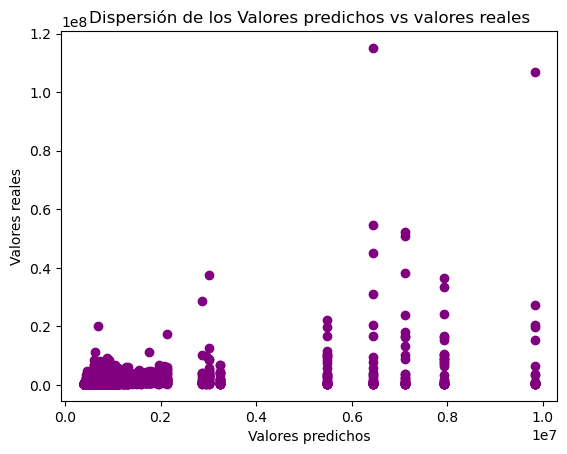

In [31]:
# Diagrama de valores predichos vs valores reales
residuos = df1['Real']- df1['pred']

fig, ax = plt.subplots()
ax.scatter(x = df1['pred'], y = df1['Real'], c = "purple")
plt.title("Dispersión de los Valores predichos vs valores reales")
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()

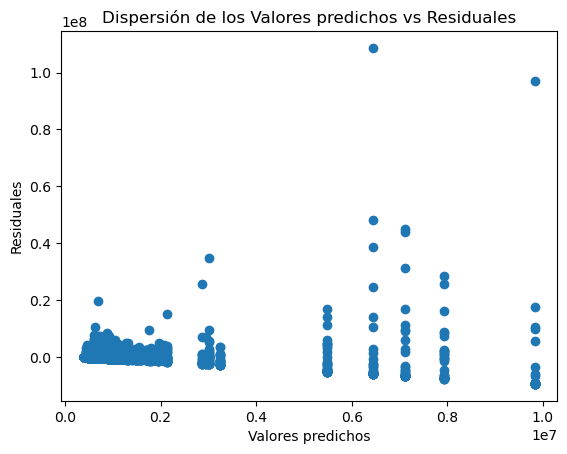

In [32]:
# Diagrama de valores predichos vs residuales
fig, ax = plt.subplots()
ax.scatter(x = df1['pred'], y = residuos)
plt.title("Dispersión de los Valores predichos vs Residuales")
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.show()

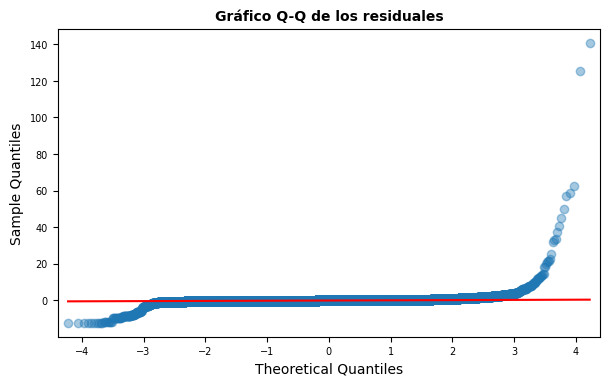

In [33]:
# Diagrama qq
import statsmodels.api as sm
fig, ax = plt.subplots(figsize = (7,4))

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de los residuales', fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()

**Despliegue del modelo**

In [34]:
pred_df

,pred
0,589033.884359
1,438909.812500
2,599715.621212
3,524240.108787
4,727968.568515
...,...
82036,594809.815642
82037,439982.656552
82038,577411.944954
82039,695399.380117


In [35]:
pred_df.shape

(82041, 1)

In [36]:
df_reclamaciones_reset = df_reclamaciones.reset_index(drop=True)
df_reclamaciones_reset

,Asegurado_Id,Sexo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Eventos,Valor_Pagado,Edad,...,Clasificacion_Diagnostico_Enfermedades del sistema nervioso,Clasificacion_Diagnostico_Enfermedades digestivas,Clasificacion_Diagnostico_Enfermedades endocrinas,Clasificacion_Diagnostico_Enfermedades respiratorias,Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios),Clasificacion_Diagnostico_Lesiones traumaticas,Clasificacion_Diagnostico_Malformaciones congenitas,Clasificacion_Diagnostico_Neoplasias,Clasificacion_Diagnostico_Pruebas complementarias,Clasificacion_Diagnostico_Trastornos mentales
0,18686469,1.0,0,0,0,0,0.0,3,1579219,40,...,0,0,0,0,0,0,0,0,0,0
1,18686469,1.0,0,0,0,0,0.0,1,442805,40,...,0,0,0,0,0,0,0,0,0,0
2,16087775,0.0,0,0,0,0,0.0,1,461626,40,...,0,0,0,0,0,0,0,0,0,0
3,16087775,0.0,0,0,0,0,0.0,1,593054,40,...,0,0,0,0,0,0,0,0,0,0
4,16087775,0.0,0,0,0,0,0.0,1,455257,40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640817,34178573,1.0,0,0,0,0,0.0,1,579721,45,...,0,0,0,0,0,0,0,0,1,0
1640818,34178573,1.0,0,0,0,0,0.0,1,479786,45,...,0,0,0,0,0,0,0,0,0,0
1640819,34178573,1.0,0,0,0,0,0.0,1,675070,45,...,0,0,0,0,0,0,0,0,0,0
1640820,34178573,1.0,0,0,0,0,0.0,2,565193,45,...,0,0,0,0,0,0,0,0,0,0


In [37]:
nuevo = df_reclamaciones_reset[:82041]
nuevo

,Asegurado_Id,Sexo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Eventos,Valor_Pagado,Edad,...,Clasificacion_Diagnostico_Enfermedades del sistema nervioso,Clasificacion_Diagnostico_Enfermedades digestivas,Clasificacion_Diagnostico_Enfermedades endocrinas,Clasificacion_Diagnostico_Enfermedades respiratorias,Clasificacion_Diagnostico_Factores que influyen en el estado de salud (Servicios Sanitarios),Clasificacion_Diagnostico_Lesiones traumaticas,Clasificacion_Diagnostico_Malformaciones congenitas,Clasificacion_Diagnostico_Neoplasias,Clasificacion_Diagnostico_Pruebas complementarias,Clasificacion_Diagnostico_Trastornos mentales
0,18686469,1.0,0,0,0,0,0.0,3,1579219,40,...,0,0,0,0,0,0,0,0,0,0
1,18686469,1.0,0,0,0,0,0.0,1,442805,40,...,0,0,0,0,0,0,0,0,0,0
2,16087775,0.0,0,0,0,0,0.0,1,461626,40,...,0,0,0,0,0,0,0,0,0,0
3,16087775,0.0,0,0,0,0,0.0,1,593054,40,...,0,0,0,0,0,0,0,0,0,0
4,16087775,0.0,0,0,0,0,0.0,1,455257,40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82036,35785491,1.0,0,0,0,0,0.0,1,430625,23,...,0,0,0,0,0,0,0,0,0,0
82037,35785491,1.0,0,0,0,0,0.0,1,430625,23,...,0,0,0,0,0,0,0,0,0,0
82038,35785491,1.0,0,0,0,0,0.0,1,438256,23,...,0,0,0,0,0,0,0,0,0,0
82039,35785491,1.0,0,0,0,0,0.0,1,438256,23,...,0,0,0,0,0,0,0,0,0,0


In [38]:
id_asegurados = nuevo['Asegurado_Id']

0        18686469
1        18686469
2        16087775
3        16087775
4        16087775
           ...   
82036    35785491
82037    35785491
82038    35785491
82039    35785491
82040    35785491
Name: Asegurado_Id, Length: 82041, dtype: int64

In [39]:
id_asegurados.shape

(82041,)

In [40]:
predicciones_id = pd.concat([id_asegurados, pred_df], axis = 1)

In [41]:
predicciones_id

,Asegurado_Id,pred
0,18686469,589033.884359
1,18686469,438909.812500
2,16087775,599715.621212
3,16087775,524240.108787
4,16087775,727968.568515
...,...,...
82036,35785491,594809.815642
82037,35785491,439982.656552
82038,35785491,577411.944954
82039,35785491,695399.380117


In [42]:
df_grouped = pd.DataFrame(predicciones_id.groupby('Asegurado_Id')['pred'].sum().reset_index())

# Mostrar el resultado

df_grouped

,Asegurado_Id,pred
0,738288,9.652148e+06
1,738789,3.199691e+06
2,739668,1.900699e+06
3,741119,5.221846e+06
4,758018,4.308834e+06
...,...,...
5823,56166287,4.003340e+06
5824,56895453,5.976883e+06
5825,57252549,7.719042e+06
5826,57939875,1.909612e+06


## Exportamos el modelo ##

In [48]:
joblib.dump(rf_final, 'Salidas\\rf_final.pkl' ) # Modelo con afinamiento
joblib.dump(df_grouped, 'Salidas\\df_grouped.pkl') # Predicciones 


['Salidas\\df_grouped.pkl']